In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [147]:
# Form a sinusoidal signal
N = 160
n = np.arange(N)
f0 = 0.06752728319488948

# Add noise to the signal
sigmaSq = 2.25 # 1.2
phi = 0.6090665392794814
A = 0.6669548209299414

x0 = A * np.cos(2 * np.pi * f0 * n+phi)
x = x0 + sigmaSq * np.random.randn(x0.size)

# Estimation parameters
A_hat = A*1.0
phi_hat = phi*1.10
fRange = np.linspace(0, 0.5, 400)

In [77]:
def gaussian(x, mu, sig):
    Z = (1/np.sqrt(2*np.pi*sig**2.))
    return Z * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def gaussian_log(x, mu, sig):
    Z = (1/np.sqrt(2*np.pi*sig**2.))
    return np.log(Z) + (-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [148]:
SSE_sum = np.zeros(fRange.size)
likelih = np.zeros(fRange.size)
likelih_log = np.zeros(fRange.size)

for idx, f in enumerate(fRange):
    #SSE
    x_est =  A_hat * np.cos(2 * np.pi * f * n+phi_hat) 
    SSE_sum[idx] = np.sum((x - x_est)**2)
    # Estimation parameters

    
    #Likelyhood
    #likelih_log[idx] = np.prod(gaussian(x,x_est,sigmaSq))
    likelih_log[idx] = np.sum(gaussian_log(x,x_est,sigmaSq))
    
    
minsseid = np.argmin(SSE_sum)  
maxlikelih = np.argmax(likelih_log)  
x_est = A_hat * np.cos(2 * np.pi * fRange[maxlikelih] * n+phi_hat) 

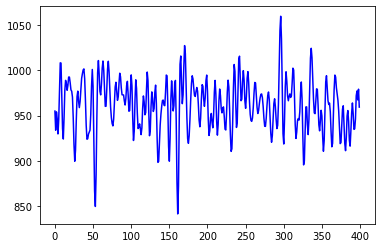

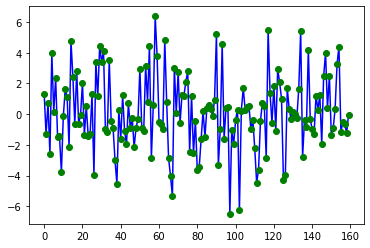

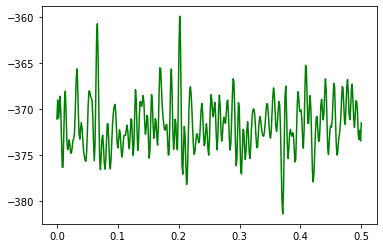

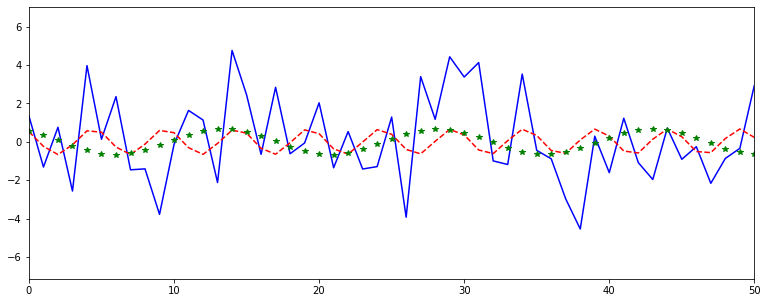

In [150]:
plt.plot(SSE_sum, 'b-')
plt.show()

plt.plot(x, 'b-')
plt.plot(x, 'go')
#plt.plot(nfRange,np.max(likelih)*gaussian(np.linspace(0,10,101),A_est[maxid],sigma2),'g--')
plt.show()


plt.plot(fRange,likelih_log, 'g-')
#plt.ylim([0,0.1**(250)])
plt.show()


plt.figure(figsize=(13, 5))
plt.xlim(0, 50)
plt.plot(x, 'b-')
plt.plot(x_est, 'r--')
plt.plot(x0, 'g*')
#plt.plot(nfRange,np.max(likelih)*gaussian(np.linspace(0,10,101),A_est[maxid],sigma2),'g--')
plt.show()


In [ ]:
# b) 800 samples are enough to see the good results
# c) With 400 samples  where sigmaSq = 2.6 the estimation starts to be wrong. 
# d) With 400 samples where sigmaSq = 2.25 the estimation starts to be wrong. 
# The noise level that this estimation can handle decreased.  